In [1]:
import numpy as np
from astropy.wcs import WCS
from astropy import units as u
import scarlet
import sep 

import pylab as plt
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
import os, re

from astropy.nddata import Cutout2D


In [2]:
#load data
files = ['lbt_r.fits', 'lbt_g.fits']

In [3]:
def mk_cutout(filename, xy_pos=None, radec_pos=None, size=[100,100], ind=0, path = ''):
    '''Make a (`size`)-large cutout from a file (`filename`) at position (`pos`).
    '''
    
    hdus = fits.open(path+filename)
    hdr = hdus[ind].header#[:10]
    #hdr['CTYPE1'] = "RA--DEC"
    #hdr['CTYPE2'] = "RA--DEC"
    #hdr['MJD-OBS'] = 0.
    wcs = WCS(hdr)
    
    img = hdus[ind].data

    ny, nx = img.shape
    
    if radec_pos: 
        xy_pos = wcs.all_world2pix(radec_pos.ra, radec_pos.dec, 0)
    print(xy_pos, radec)
    
    cut = Cutout2D(img, xy_pos, (size[0], size[1]) , wcs = wcs)  
    return cut

[array(6625.08899269), array(8787.19670658)] <SkyCoord (ICRS): (ra, dec) in deg
    (40.02916667, -8.229)>


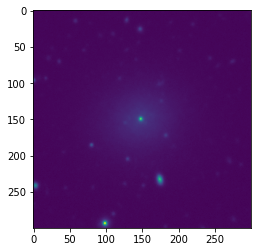

[array(6625.08899269), array(8787.19670658)] <SkyCoord (ICRS): (ra, dec) in deg
    (40.02916667, -8.229)>


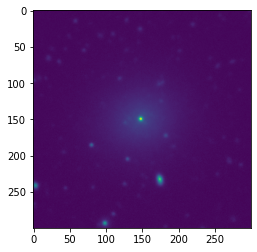

[array(6783.42662504), array(5287.59574747)] <SkyCoord (ICRS): (ra, dec) in deg
    (40.01916667, -8.44675)>


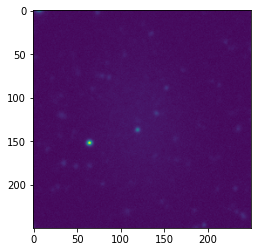

[array(6783.42662504), array(5287.59574747)] <SkyCoord (ICRS): (ra, dec) in deg
    (40.01916667, -8.44675)>


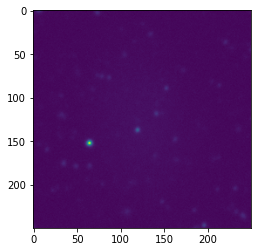

[array(8460.92708706), array(8795.98282729)] <SkyCoord (ICRS): (ra, dec) in deg
    (39.91375, -8.22841667)>


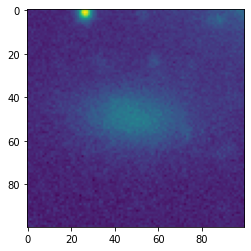

[array(8460.92708706), array(8795.98282729)] <SkyCoord (ICRS): (ra, dec) in deg
    (39.91375, -8.22841667)>


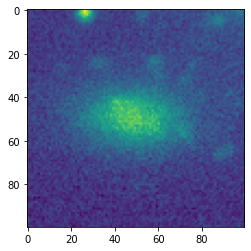

[array(5180.30020655), array(8554.69602221)] <SkyCoord (ICRS): (ra, dec) in deg
    (40.12, -8.24347222)>


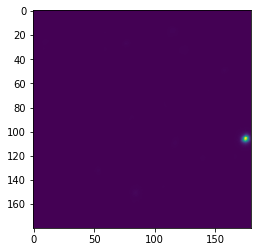

[array(5180.30020655), array(8554.69602221)] <SkyCoord (ICRS): (ra, dec) in deg
    (40.12, -8.24347222)>


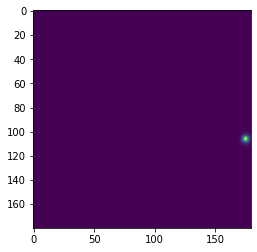

[array(4398.68675086), array(6267.09594941)] <SkyCoord (ICRS): (ra, dec) in deg
    (40.16916667, -8.38580556)>


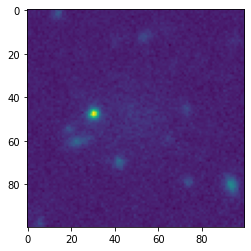

[array(4398.68675086), array(6267.09594941)] <SkyCoord (ICRS): (ra, dec) in deg
    (40.16916667, -8.38580556)>


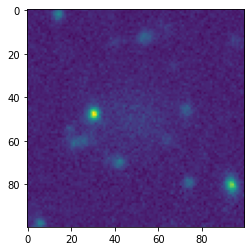

In [4]:
sizes = [(400,400),(250,250),(100,100),(180,180),(100,100)]
names = ['SDSSJ0240',
         'NGC1052-DF1',
         'T20-12000',
         'LSB21 ',
         'LBT1']

positions = [SkyCoord('02:40:07.0', '-08:13:44.4', unit=(u.hourangle, u.deg)), 
         SkyCoord('02:40:04.6', '-08:26:48.3',unit=(u.hourangle, u.deg)), 
         SkyCoord('02:39:39.3', '-08:13:42.3',unit=(u.hourangle, u.deg)), 
         SkyCoord('02:40:28.8', '-08:14:36.5',unit=(u.hourangle, u.deg)),
         SkyCoord('02:40:40.6', '-08:23:08.9',unit=(u.hourangle, u.deg))]

cubes = []
for radec, s, n in zip(positions, sizes, names): 
    cube = []
    for f in files:
        cut = mk_cutout(f, radec_pos=radec, size=s, ind=1, path='Data/LBT/')
        cube.append(cut.data)
        plt.imshow(np.array(cut.data))
        plt.show()
        
    hdu = fits.PrimaryHDU(np.array(cube), cut.wcs.to_header())
    hdul = fits.HDUList([hdu])
    hdul.writeto(f'Data/LBT/Cutouts/cut_{n}.fits', overwrite=True)
        
        
    